## Poliynomial Regression-Overfiting-Underfiting

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [62]:
from sklearn.preprocessing import PolynomialFeatures

## Read Dataset

In [64]:
df = pd.read_csv("Advertising.csv")

In [65]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Polynomial Converter

In [66]:
X = df.drop("sales", axis =1)
y = df.sales

In [67]:
polynomial_converter = PolynomialFeatures(degree =2, include_bias =False)

In [68]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [69]:
poly_features = polynomial_converter.transform(X)

In [70]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [71]:
poly_features.shape

(200, 9)

## Train | Test Split

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.2, random_state = 42)

## Model for fitting

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
model_poly = LinearRegression()

In [76]:
model_poly.fit(X_train, y_train)

LinearRegression()

In [77]:
y_pred = model_poly.predict(X_test)

In [79]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
compare = pd.DataFrame(my_dict)
compare

,Actual,pred,residual
95,16.9,17.254436,-0.354436
15,22.4,22.719332,-0.319332
30,21.4,20.427994,0.972006
158,7.3,7.542709,-0.242709
128,24.7,24.371030,0.328970
115,12.6,12.559272,0.040728
69,22.3,22.807850,-0.507850
170,8.4,8.343714,0.056286
174,11.5,12.058602,-0.558602
45,14.9,15.690246,-0.790246


## Poly Coefficients

In [80]:
model_poly.coef_

array([ 5.32356160e-02,  1.70980451e-02,  1.05807447e-02, -1.12286779e-04,
        1.11121741e-03, -7.37989541e-05,  1.32842962e-04,  1.24892479e-04,
        2.79665560e-05])

## Evaluation on the Test Set

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [82]:
y_pred = model_poly.predict(X_test)


In [83]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score : {R2_score}")
    print(f"MAE {'':<5}: {mae}")
    print(f"MSE {'':<5}: {mse}")
    print(f"RMSE{'':<5}: {rmse}")
    

In [84]:
eval_metric(y_test, y_pred)


Model testing performance:
--------------------------
R2_score : 0.9869181490609604
MAE      : 0.5261794444043822
MSE      : 0.4129102285379007
RMSE     : 0.6425809120553618


In [85]:
y_train_pred = model_poly.predict(X_train)


In [86]:
eval_metric(y_train, y_train_pred)


Model testing performance:
--------------------------
R2_score : 0.986104518792419
MAE      : 0.4089721951355271
MSE      : 0.3603966744701224
RMSE     : 0.6003304710491734


## Let's find optimal degree of poly

In [87]:
def poly(d):
    
    train_rmse_errors = []
    test_rmse_errors = []
    number_of_features = []
    
    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias = False)
        poly_features = polynomial_converter.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)
        
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, 
                         "number of features":number_of_features}, index=range(1,d))


In [88]:
poly(7)
 

,train_rmse_errors,test_rmse_errors,number of features
1,1.644728,1.781600,3
2,0.600330,0.642581,9
3,0.464824,0.542742,19
4,0.368413,0.786099,34
5,0.250495,8.746500,55
6,0.205805,28.370794,83


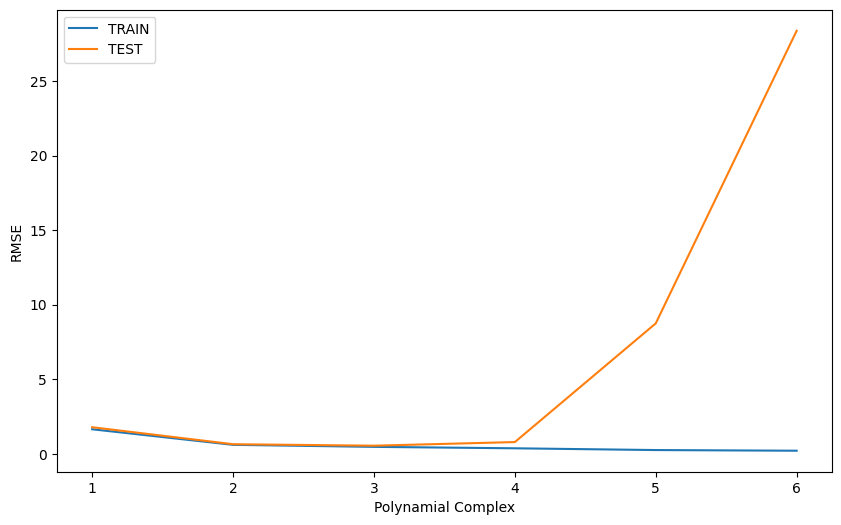

In [89]:
plt.plot(range(1,7), poly(7)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,7), poly(7)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();


## Finalizing Model Choice

In [91]:
final_poly_converter = PolynomialFeatures(degree = 2, include_bias=False)


In [92]:
final_model = LinearRegression()

In [93]:
poly_X = final_poly_converter.fit_transform(X)



In [94]:
final_model.fit(poly_X, y)



LinearRegression()

In [95]:
poly_X.shape

(200, 9)

## Predictions

In [96]:
new_record = [[150, 20, 15]]



In [97]:
new_record_poly = final_poly_converter.fit_transform(new_record)


In [98]:
new_record_poly.shape


(1, 9)

In [99]:
final_model.predict(new_record_poly) 

array([14.17474185])

## Overfitting

In [100]:
over_poly_converter = PolynomialFeatures(degree = 5, include_bias =False)

In [101]:
over_model = LinearRegression()

In [102]:
poly_features = over_poly_converter.fit_transform(X)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

In [104]:
over_model.fit(X_train, y_train)

LinearRegression()

In [105]:
y_pred_over = over_model.predict(X_test)

In [106]:
eval_metric(y_test, y_pred_over)

Model testing performance:
--------------------------
R2_score : -1.423718450685365
MAE      : 2.107650089969333
MSE      : 76.50126454181226
RMSE     : 8.746500131013105


In [107]:
y_train_over = over_model.predict(X_train)

In [108]:
eval_metric(y_train, y_train_over)


Model testing performance:
--------------------------
R2_score : 0.9975806950878237
MAE      : 0.18795823571721182
MSE      : 0.06274769702843493
RMSE     : 0.25049490419654236
